In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
#Since id variable has all unique values, removing it
df = df.drop('id',axis=1)

In [5]:
#since location values are not reliable as they are put by people, removing it
df = df.drop('location',axis=1)

In [6]:
df.shape

(7613, 3)

In [7]:
df.head()

,keyword,text,target
0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   keyword  7552 non-null   object
 1   text     7613 non-null   object
 2   target   7613 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 178.6+ KB


In [9]:
df.describe()

,target
count,7613.00000
mean,0.42966
std,0.49506
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [10]:
df.sample(10)

,keyword,text,target
1989,damage,@capicapricapri @Brento_Bento wha t is this ki...,0
2306,demolished,.\r\n.@Colts get demolished by #Patriots like ...,0
5248,oil%20spill,Refugio oil spill may have been costlier bigge...,1
6445,suicide%20bombing,Turkish troops killed in Kurdish militant 'sui...,1
6091,sinking,that horrible sinking feeling when youÛªve be...,1
2968,drowning,@_jeesss_ @Ethereal_7 Hello 911 yeah we have s...,1
156,airplane%20accident,Pilot Dies In Plane Crash At Car Festival http...,1
957,body%20bag,Louis Vuitton Monogram Sophie Limited Edition ...,0
1881,crush,kenny holland crush da vida,0
2581,destroyed,Media stocks are getting destroyed (DIS FOXA C...,0


In [11]:
#checking for null values
df.isnull().sum()/len(df)*100

keyword    0.801261
text       0.000000
target     0.000000
dtype: float64

In [12]:
#filling null values with unknown
df['keyword'] = df['keyword'].fillna('unknown')

In [13]:
df.isnull().sum()/len(df)*100

keyword    0.0
text       0.0
target     0.0
dtype: float64

In [14]:
#checking duplicate values
df.duplicated().sum()

np.int64(72)

In [15]:
#dropping duplicates
df.drop_duplicates(keep = 'first',inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
# Distribution of disaster and non-disaster tweets

print(df['target'].value_counts())
print((df['target'].value_counts()/df['target'].count())*100)

target
0    4317
1    3224
Name: count, dtype: int64
target
0    57.247049
1    42.752951
Name: count, dtype: float64


C:\Users\krish\AppData\Local\Temp\ipykernel_20456\69033045.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'], rotation=0)


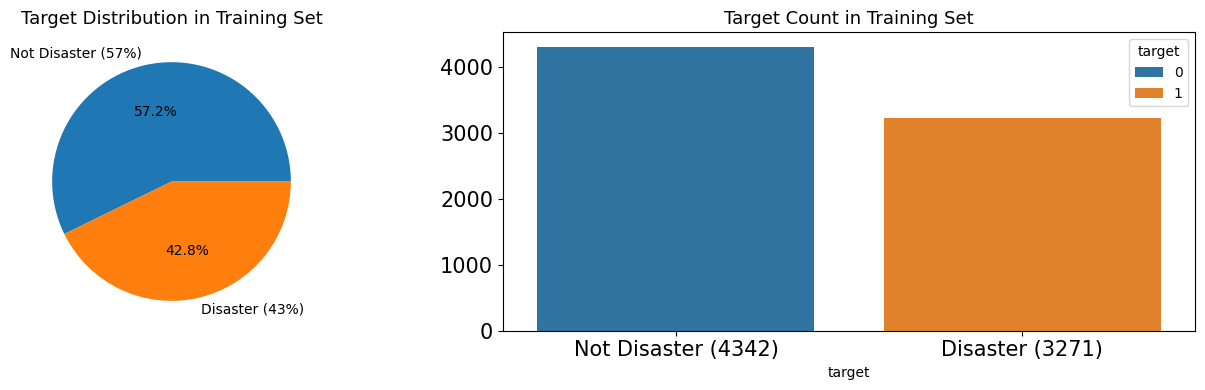

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4), dpi=100)

df.groupby('target').count()['text'].plot(kind='pie', ax=axes[0], labels=['Not Disaster (57%)', 'Disaster (43%)'], autopct='%1.1f%%')
sns.countplot(x='target', data=df, hue='target', ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'], rotation=0)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.tight_layout()
plt.show()

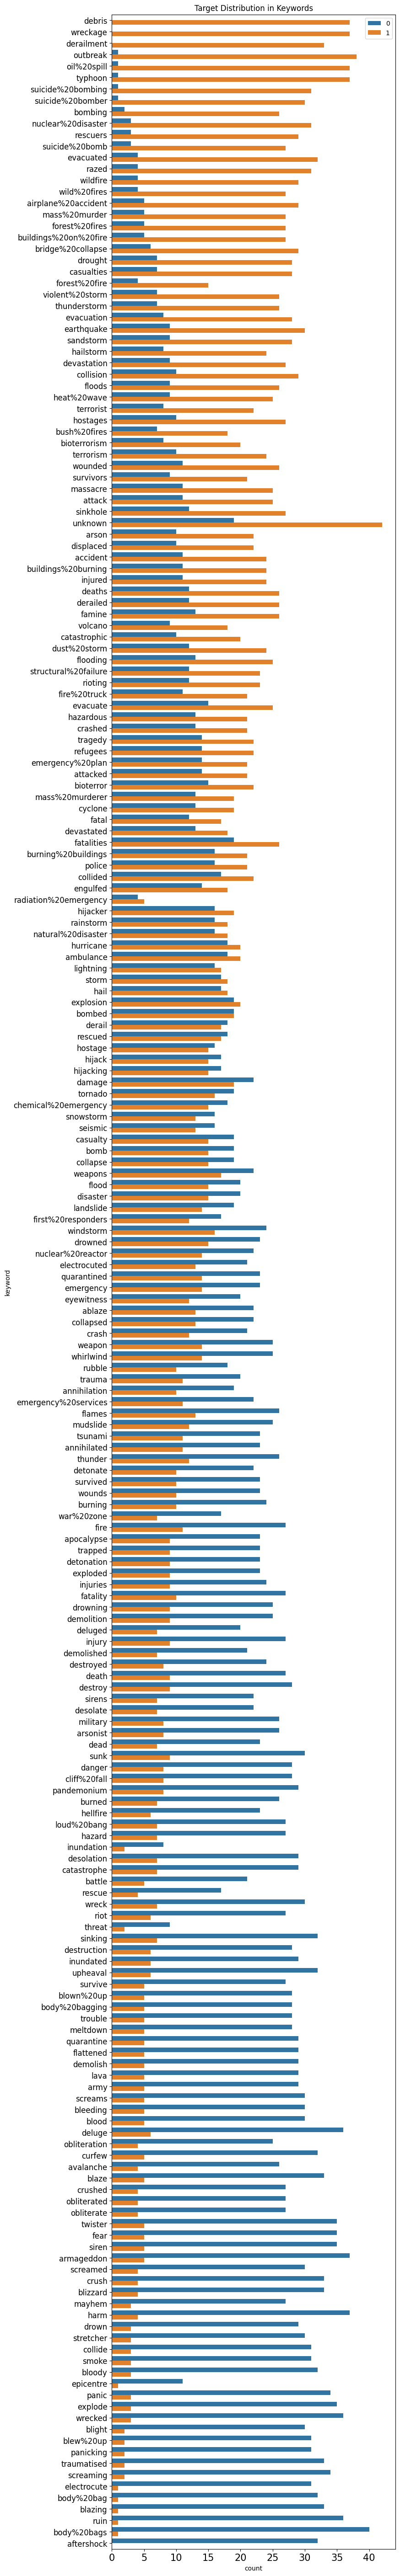

In [19]:
df['target_mean'] = df.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=df.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

df.drop(columns=['target_mean'], inplace=True)

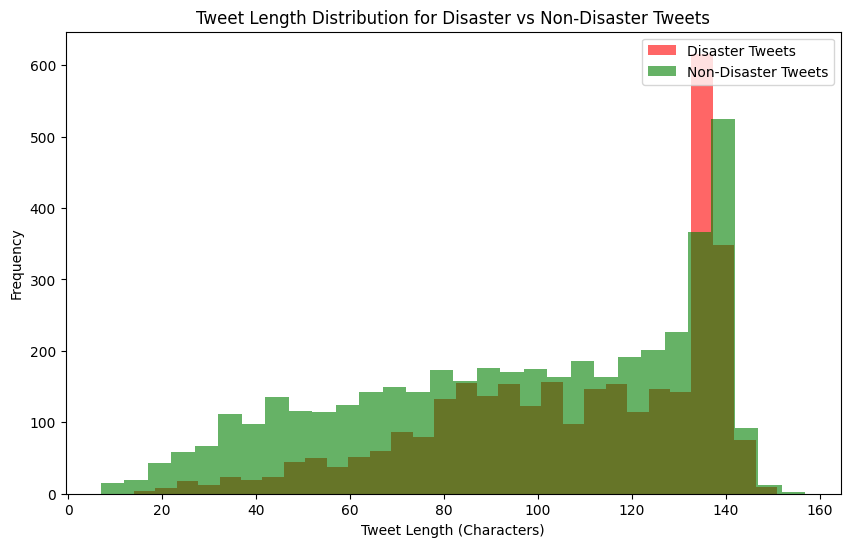

In [20]:
disaster_tweet_len = df[df['target'] == 1]['text'].str.len()
non_disaster_tweet_len = df[df['target'] == 0]['text'].str.len()

# Plotting both on the same histogram
plt.figure(figsize=(10, 6))
plt.hist(disaster_tweet_len, color='red', alpha=0.6, label='Disaster Tweets', bins=30)
plt.hist(non_disaster_tweet_len, color='green', alpha=0.6, label='Non-Disaster Tweets', bins=30)

# Adding titles and labels
plt.title('Tweet Length Distribution for Disaster vs Non-Disaster Tweets')
plt.xlabel('Tweet Length (Characters)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Text Preprocessing

In [21]:
print(f"Example of disaster tweet: {df.text[df.target == 1].iloc[2]}")
print(f"Example of non-disaster tweet: {df.text[df.target == 0].iloc[41]}")

Example of disaster tweet: All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
Example of non-disaster tweet: RT @SleepJunkies: Sleeping pills double your risk of a car accident http://t.co/7s9Nm1fiCT


In [22]:
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
import re
from nltk import word_tokenize
def clean_words(text):
    text = re.sub(r'(http.*)|#', '', text)
    tokens = word_tokenize(text)
    stops = stopwords.words('english')
    clean_tokens = [token.lower() for token in tokens if token.lower() not in stops and token.isalnum()]
    return ' '.join(clean_tokens)

In [24]:
df['text'] = df['text'].apply(clean_words)

In [25]:
#df['keyword'] = df['keyword'].apply(clean_words)
#dropping keyword 
df.drop('keyword',inplace=True,axis=1)

In [26]:
#lemmatizing using spacy
import spacy

nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):

    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])

    return lemmatized_text

In [27]:
df['text'] = df['text'].apply(lemmatize_text)

In [28]:
df.sample(20)

,text,target
3959,slopeofhope maybe plan dilute safely say start...,0
5660,last chance animal rescue 3 new post,0
1890,mango juice crush ice gt gt gt gt,0
2702,new favorite trivium detonation rrusa,0
4465,specially modify land stadium rescue hostage i...,1
3731,mcnabbychic fear,0
3065,scared living seattle predict earthquake go de...,1
7107,skarletan åç storm violent swell emotion nothing,0
1227,witness video show car explode behind burn bui...,1
4779,tkyonly1fmk break news unconfirme hear loud ba...,0


In [29]:
from nltk.probability import FreqDist
def make_freq(data):
    all_tweets = " ".join(data)

    tokens = word_tokenize(all_tweets)
    frequency = FreqDist(tokens)

    return frequency

make_freq(df["text"])

FreqDist({'get': 415, 'like': 390, 'fire': 346, 'amp': 323, 'go': 300, 'new': 217, 'one': 202, 'say': 195, 'people': 194, 'see': 181, ...})

In [30]:
disasters = df["text"][df.target == 1]
no_disasters = df["text"][df.target == 0]

make_freq(disasters)

FreqDist({'fire': 258, 'kill': 143, 'amp': 129, 'disaster': 118, 'news': 117, 'get': 113, 'california': 110, 'police': 107, 'bomb': 106, 'people': 103, ...})

In [31]:
make_freq(no_disasters)


FreqDist({'get': 302, 'like': 293, 'go': 213, 'amp': 194, 'new': 163, 'one': 134, 'make': 128, 'see': 126, 'body': 111, 'love': 108, ...})

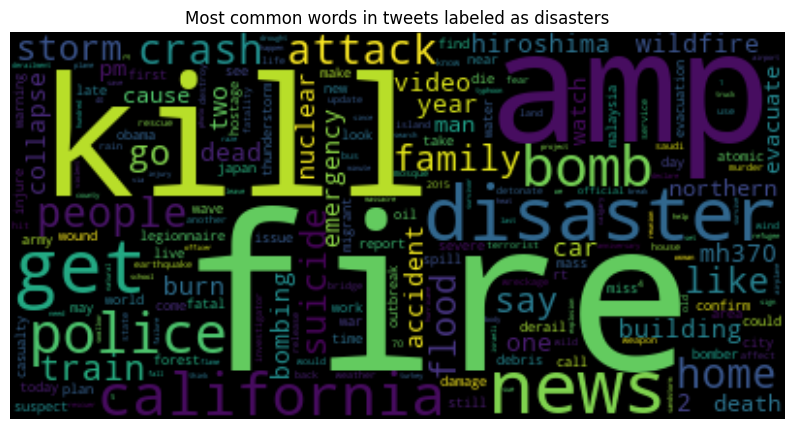

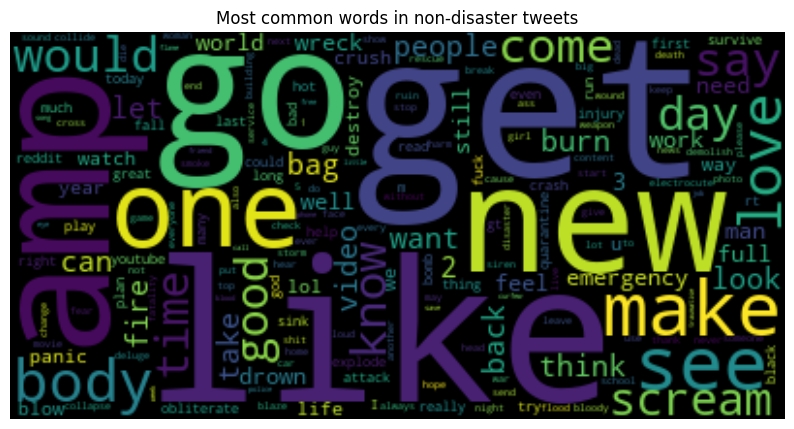

In [32]:
from wordcloud import WordCloud

def make_cloud(data, title = None):
    wordcloud = WordCloud().generate_from_frequencies(make_freq(data))

    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

make_cloud(disasters, "Most common words in tweets labeled as disasters")
make_cloud(no_disasters, "Most common words in non-disaster tweets")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

vectorizer = CountVectorizer()

vectors = vectorizer.fit_transform(df["text"])
#test_vectors = vectorizer.transform(test_data["text"])
print(vectors[:1])

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

# Transform the text into feature vectors (TF-IDF)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Define the models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'NaiveBayes': MultinomialNB(),
    'LogisticRegression': LogisticRegression(random_state=42)

In [ ]:
results = {}

In [ ]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    try:
        # Train the model
        model.fit(X_train_tfidf, y_train)

        # Make predictions on the test and training sets
        y_test_pred = model.predict(X_test_tfidf)
        y_train_pred = model.predict(X_train_tfidf)

        # Evaluate the model on test set
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_report = classification_report(y_test, y_test_pred, output_dict=False)

        # Evaluate the model on training set
        train_accuracy = accuracy_score(y_train, y_train_pred)

        # Store the results
        results[model_name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'test_classification_report': test_report
        }



    except Exception as e:
        print(f"Error occurred while training {model_name}: {e}")

In [ ]:
# Display the results
print("\nModel Evaluation Results:")
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Train Accuracy: {result['train_accuracy']}")
    print(f"Test Accuracy: {result['test_accuracy']}")
    print(f"Test Classification Report:\n{result['test_classification_report']}")
    print('-'*50)